In [2]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from classy import Class  # CLASS python wrapper
import math

Fonction qui permet de calculer les $C_{l}$


In [3]:
def utility_function_call_CLASS(input_dict, l_max=2000):
    """Compute Cl with this utility function, repeat less code."""
    cosmo = Class()
    cosmo.set(input_dict)
    cosmo.compute()
    temp_cl = cosmo.lensed_cl(l_max)
    cosmo.struct_cleanup()
    cosmo.empty()
    return temp_cl

 Liste de tout les paramètres du modèle standard $\Lambda CDM$ en rajoutant le ratio scalaire/tenseur

In [4]:
params = {
    'output': 'tCl lCl pCl',
    'modes' :'s,t',
    'l_max_scalars': 2000,
    'lensing': 'yes',
    'omega_cdm': 0.120,
    'omega_b': 0.0224, 
    'h': 0.674,
    # à changer
    'ln10^{10}A_s': 3.047,
    #'A_s' : 3.044
    'n_s':0.965,
    'tau_reio' : 0.054,
    'r':0,
}

Ici on fait varier $n_{s}$

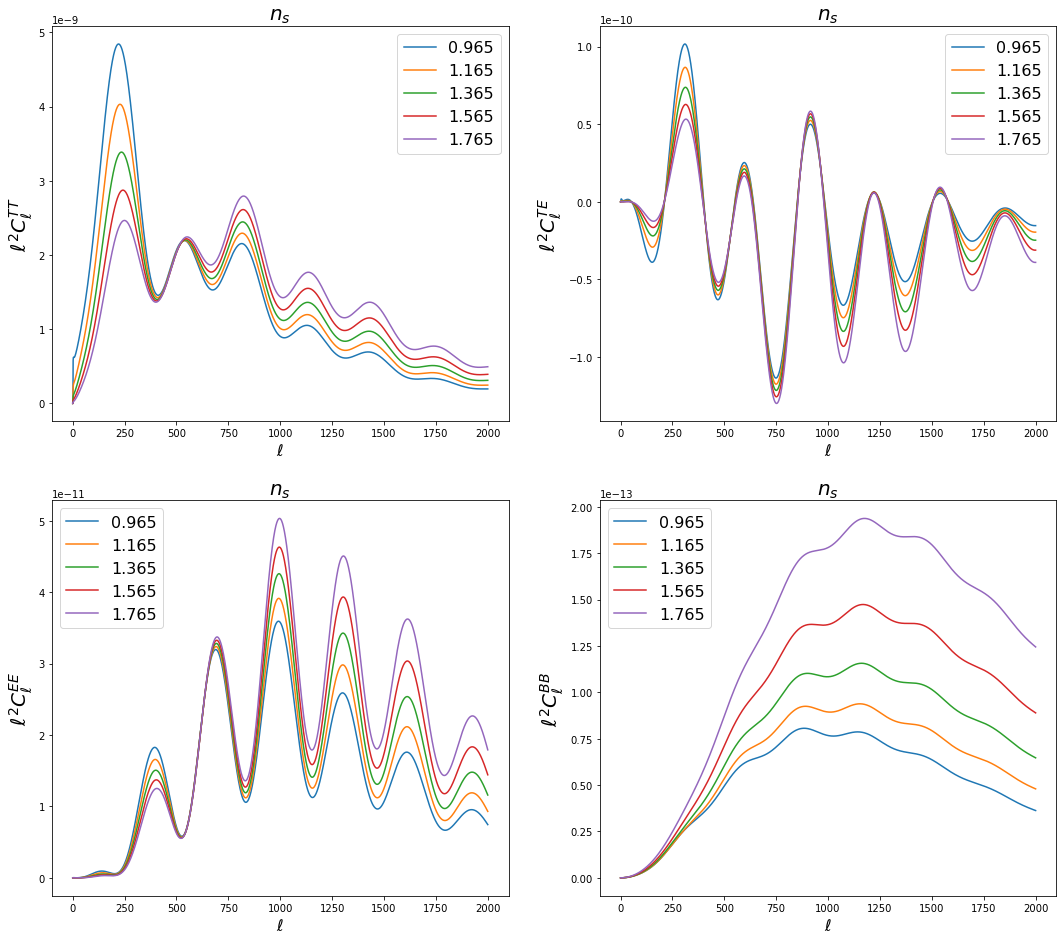

In [5]:
fig, axs = plt.subplots(2, 2,figsize = (18, 16))
axs[0,0].set_xlabel('$\ell$',fontsize=16)
axs[0,0].set_ylabel('$\ell^{2} C_{\ell}^{TT}$',fontsize=20)
axs[0,1].set_xlabel('$\ell$',fontsize=16)
axs[0,1].set_ylabel('$\ell^{2} C_{\ell}^{TE}$',fontsize=20)
axs[1,0].set_xlabel('$\ell$',fontsize=16)
axs[1,0].set_ylabel('$\ell^{2} C_{\ell}^{EE}$',fontsize=20)
axs[1,1].set_xlabel('$\ell$',fontsize=16)
axs[1,1].set_ylabel('$\ell^{2} C_{\ell}^{BB}$',fontsize=20)


for i in range(5):
    params['n_s']=0.965+i*0.2
    cl_tt = utility_function_call_CLASS(params)
    axs[0,0].plot(cl_tt['ell'],cl_tt['tt']*cl_tt['ell']**2,label= "%.3f"%params['n_s'])
    axs[1,0].plot(cl_tt['ell'],cl_tt['ee']*cl_tt['ell']**2,label="%.3f"%params['n_s'])
    axs[0,1].plot(cl_tt['ell'],cl_tt['te']*cl_tt['ell']**2,label="%.3f"%params['n_s'])
    axs[1,1].plot(cl_tt['ell'],cl_tt['bb']*cl_tt['ell']**2,label="%.3f"%params['n_s'])
    
axs[0,0].legend(fontsize=16)
axs[0,1].legend(fontsize=16)
axs[1,0].legend(fontsize=16)
axs[1,1].legend(fontsize=16)

axs[0,0].set_title('$n_{s}$',fontsize=20)
axs[0,1].set_title('$n_{s}$',fontsize=20)
axs[1,0].set_title('$n_{s}$',fontsize=20)
axs[1,1].set_title('$n_{s}$',fontsize=20)

axs[0,0].legend(fontsize=16)
axs[0,1].legend(fontsize=16)
axs[1,0].legend(fontsize=16)
axs[1,1].legend(fontsize=16)
params['n_s']=0.965

Ici on fait varier $\tau$, l'amplitude du spectre est proportionnelle à $A_{s} e^{-2\tau}$

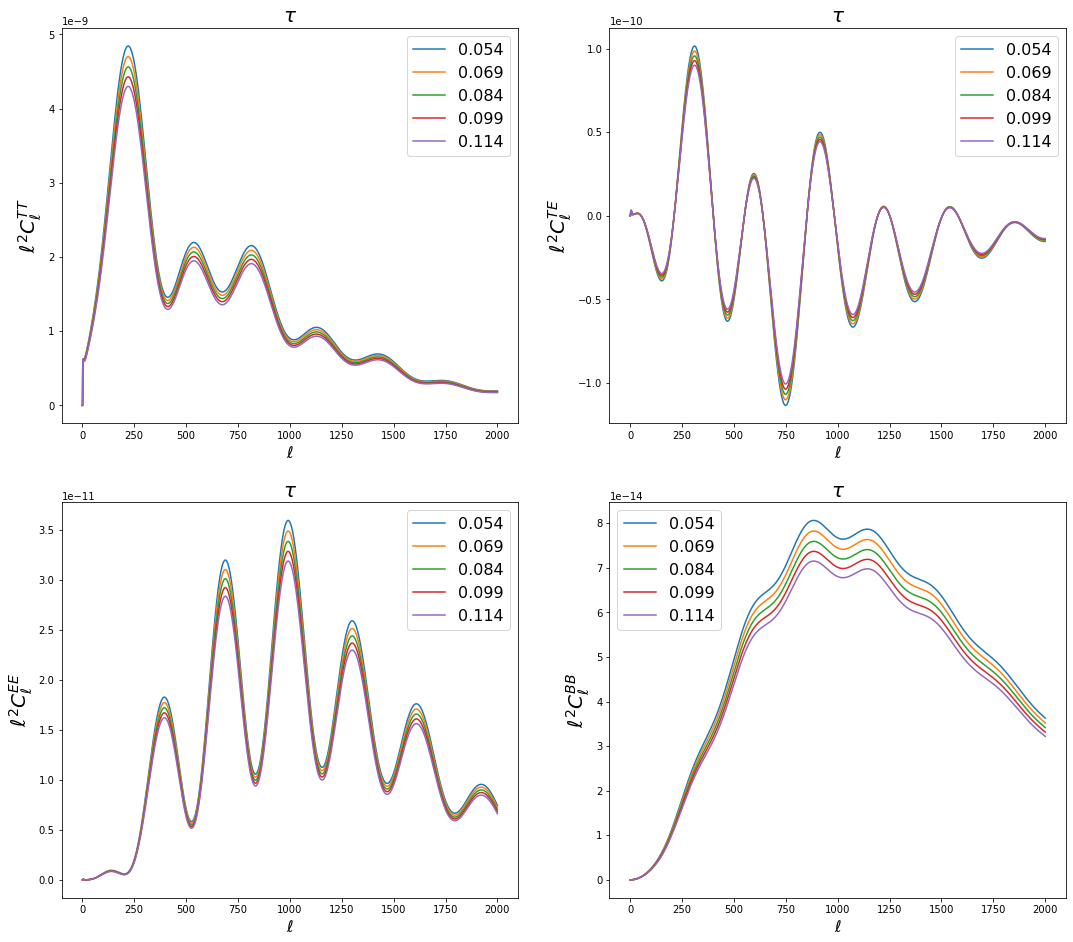

In [6]:
fig, axs = plt.subplots(2, 2,figsize = (18, 16))
axs[0,0].set_xlabel('$\ell$',fontsize=16)
axs[0,0].set_ylabel('$\ell^{2} C_{\ell}^{TT}$',fontsize=20)
axs[0,1].set_xlabel('$\ell$',fontsize=16)
axs[0,1].set_ylabel('$\ell^{2} C_{\ell}^{TE}$',fontsize=20)
axs[1,0].set_xlabel('$\ell$',fontsize=16)
axs[1,0].set_ylabel('$\ell^{2} C_{\ell}^{EE}$',fontsize=20)
axs[1,1].set_xlabel('$\ell$',fontsize=16)
axs[1,1].set_ylabel('$\ell^{2} C_{\ell}^{BB}$',fontsize=20)


for i in range(5):
    params['tau_reio']=0.054+i*0.015
    cl_tt = utility_function_call_CLASS(params)
    axs[0,0].plot(cl_tt['ell'],cl_tt['tt']*cl_tt['ell']**2,label="%.3f"%params['tau_reio'])
    axs[1,0].plot(cl_tt['ell'],cl_tt['ee']*cl_tt['ell']**2,label="%.3f"%params['tau_reio'])
    axs[0,1].plot(cl_tt['ell'],cl_tt['te']*cl_tt['ell']**2,label="%.3f"%params['tau_reio'])
    axs[1,1].plot(cl_tt['ell'],cl_tt['bb']*cl_tt['ell']**2,label="%.3f"%params['tau_reio'])
    
axs[0,0].legend(fontsize=16)
axs[0,1].legend(fontsize=16)
axs[1,0].legend(fontsize=16)
axs[1,1].legend(fontsize=16)

axs[0,0].set_title(r'$\tau$',fontsize=20)
axs[0,1].set_title(r'$\tau$',fontsize=20)
axs[1,0].set_title(r'$\tau$',fontsize=20)
axs[1,1].set_title(r'$\tau$',fontsize=20)
axs[0,0].legend(fontsize=16)
axs[0,1].legend(fontsize=16)
axs[1,0].legend(fontsize=16)
axs[1,1].legend(fontsize=16)
params['tau_reio']=0.054

On fait varier $A_{s}$

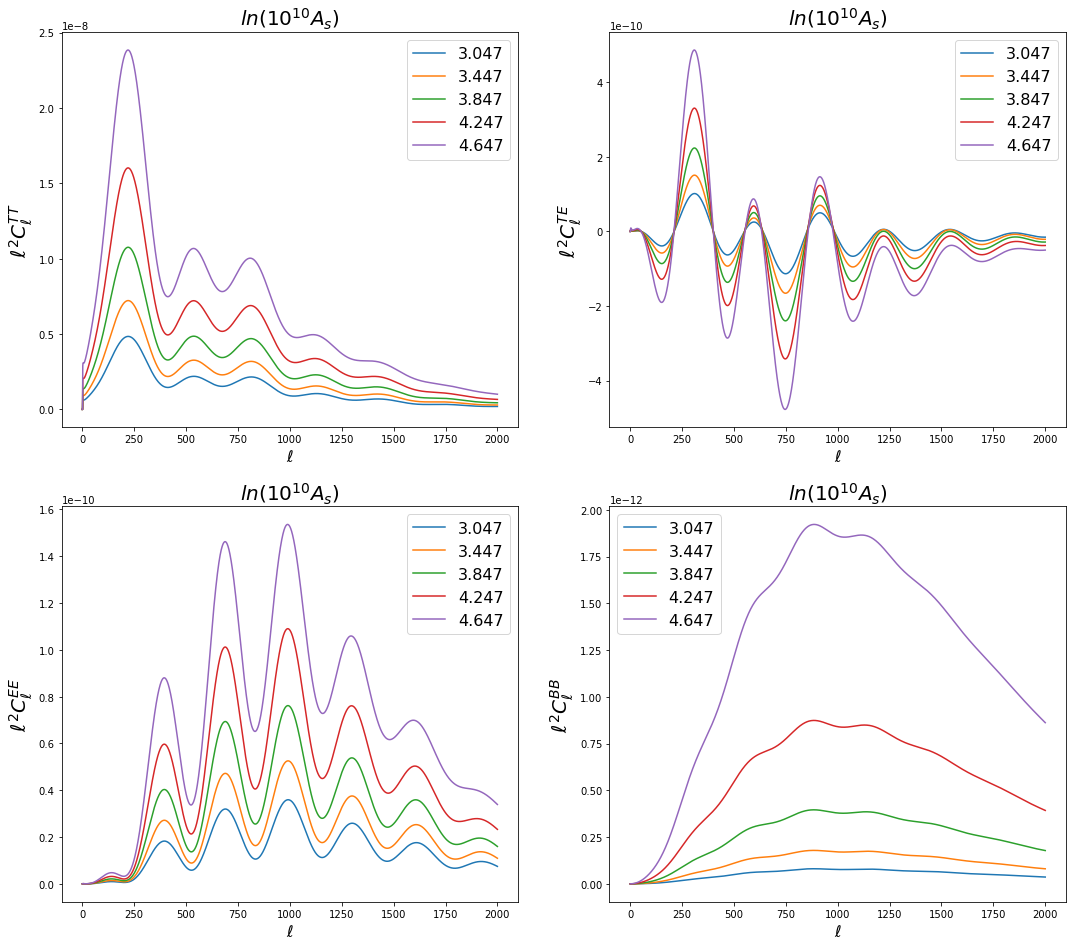

In [7]:
fig, axs = plt.subplots(2, 2,figsize = (18, 16))
axs[0,0].set_xlabel('$\ell$',fontsize=16)
axs[0,0].set_ylabel('$\ell^{2} C_{\ell}^{TT}$',fontsize=20)
axs[0,1].set_xlabel('$\ell$',fontsize=16)
axs[0,1].set_ylabel('$\ell^{2} C_{\ell}^{TE}$',fontsize=20)
axs[1,0].set_xlabel('$\ell$',fontsize=16)
axs[1,0].set_ylabel('$\ell^{2} C_{\ell}^{EE}$',fontsize=20)
axs[1,1].set_xlabel('$\ell$',fontsize=16)
axs[1,1].set_ylabel('$\ell^{2} C_{\ell}^{BB}$',fontsize=20)


for i in range(5):
    params['ln10^{10}A_s']=3.047+i*0.40
    cl_tt = utility_function_call_CLASS(params)
    axs[0,0].plot(cl_tt['ell'],cl_tt['tt']*cl_tt['ell']**2,label= "%.3f"%params['ln10^{10}A_s'])
    axs[1,0].plot(cl_tt['ell'],cl_tt['ee']*cl_tt['ell']**2,label="%.3f"%params['ln10^{10}A_s'])
    axs[0,1].plot(cl_tt['ell'],cl_tt['te']*cl_tt['ell']**2,label="%.3f"%params['ln10^{10}A_s'])
    axs[1,1].plot(cl_tt['ell'],cl_tt['bb']*cl_tt['ell']**2,label="%.3f"%params['ln10^{10}A_s'])
    
axs[0,0].legend(fontsize=16)
axs[0,1].legend(fontsize=16)
axs[1,0].legend(fontsize=16)
axs[1,1].legend(fontsize=16)

axs[0,0].set_title('$ln(10^{10}A_{s})$',fontsize=20)
axs[0,1].set_title('$ln(10^{10}A_{s})$',fontsize=20)
axs[1,0].set_title('$ln(10^{10}A_{s})$',fontsize=20)
axs[1,1].set_title('$ln(10^{10}A_{s})$',fontsize=20)

axs[0,0].legend(fontsize=16)
axs[0,1].legend(fontsize=16)
axs[1,0].legend(fontsize=16)
axs[1,1].legend(fontsize=16)
params['ln10^{10}A_s']= 3.047

Ici on fait varier h 

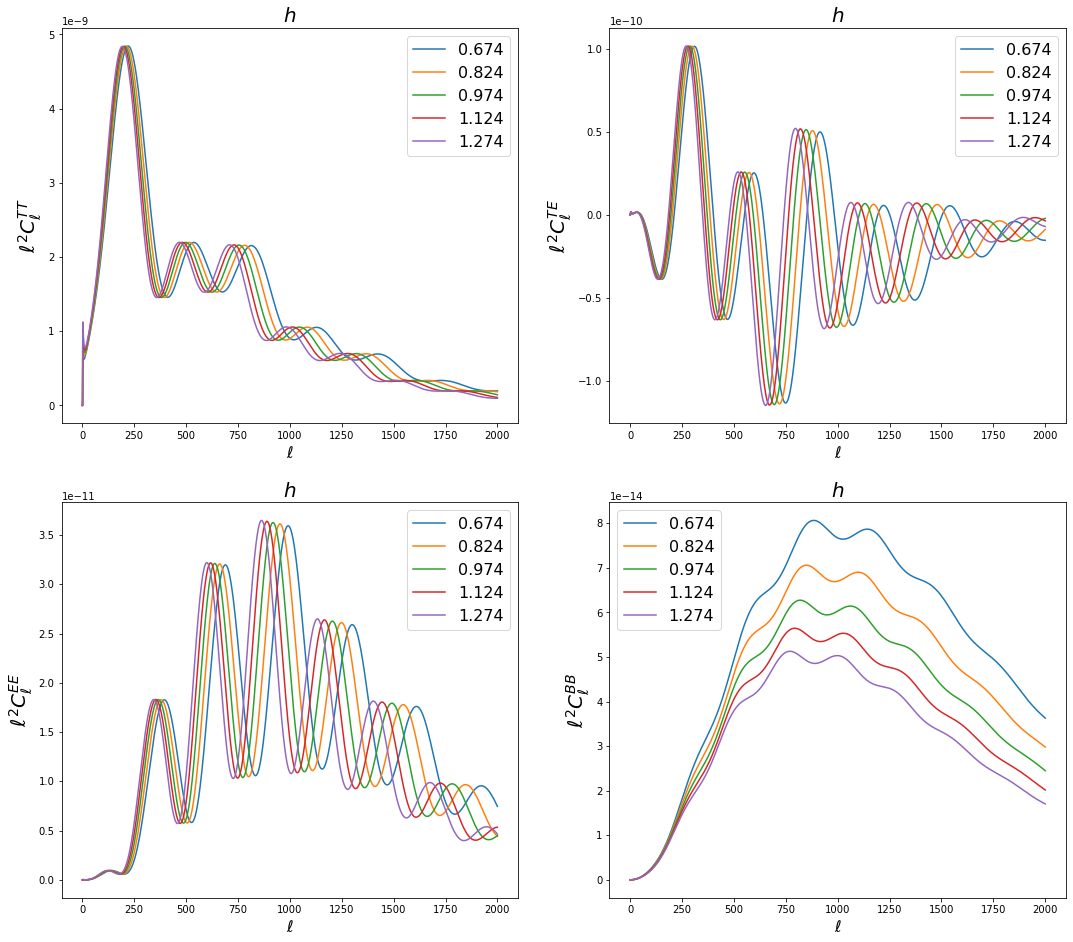

In [8]:
fig, axs = plt.subplots(2, 2,figsize = (18, 16))
axs[0,0].set_xlabel('$\ell$',fontsize=16)
axs[0,0].set_ylabel('$\ell^{2} C_{\ell}^{TT}$',fontsize=20)
axs[0,1].set_xlabel('$\ell$',fontsize=16)
axs[0,1].set_ylabel('$\ell^{2} C_{\ell}^{TE}$',fontsize=20)
axs[1,0].set_xlabel('$\ell$',fontsize=16)
axs[1,0].set_ylabel('$\ell^{2} C_{\ell}^{EE}$',fontsize=20)
axs[1,1].set_xlabel('$\ell$',fontsize=16)
axs[1,1].set_ylabel('$\ell^{2} C_{\ell}^{BB}$',fontsize=20)


for i in range(5):
    params['h']=0.674+i*0.15
    cl_tt = utility_function_call_CLASS(params)
    axs[0,0].plot(cl_tt['ell'],cl_tt['tt']*cl_tt['ell']**2,label= "%.3f"%params['h'])
    axs[1,0].plot(cl_tt['ell'],cl_tt['ee']*cl_tt['ell']**2,label="%.3f"%params['h'])
    axs[0,1].plot(cl_tt['ell'],cl_tt['te']*cl_tt['ell']**2,label="%.3f"%params['h'])
    axs[1,1].plot(cl_tt['ell'],cl_tt['bb']*cl_tt['ell']**2,label="%.3f"%params['h'])
    
axs[0,0].legend(fontsize=16)
axs[0,1].legend(fontsize=16)
axs[1,0].legend(fontsize=16)
axs[1,1].legend(fontsize=16)

axs[0,0].set_title('$h$',fontsize=20)
axs[0,1].set_title('$h$',fontsize=20)
axs[1,0].set_title('$h$',fontsize=20)
axs[1,1].set_title('$h$',fontsize=20)

axs[0,0].legend(fontsize=16)
axs[0,1].legend(fontsize=16)
axs[1,0].legend(fontsize=16)
axs[1,1].legend(fontsize=16)
params['h']= 0.674

On fait varier $\Omega_{b}$

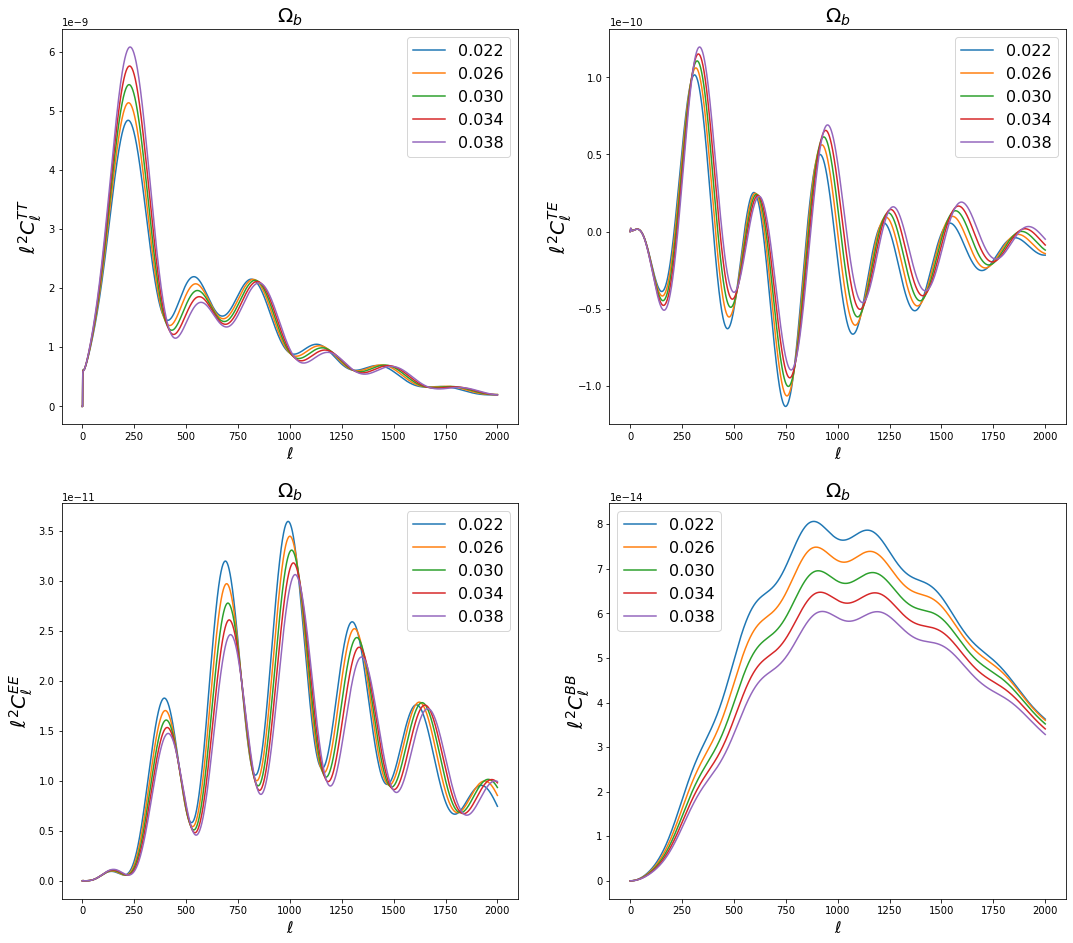

In [9]:
fig, axs = plt.subplots(2, 2,figsize = (18, 16))
axs[0,0].set_xlabel('$\ell$',fontsize=16)
axs[0,0].set_ylabel('$\ell^{2} C_{\ell}^{TT}$',fontsize=20)
axs[0,1].set_xlabel('$\ell$',fontsize=16)
axs[0,1].set_ylabel('$\ell^{2} C_{\ell}^{TE}$',fontsize=20)
axs[1,0].set_xlabel('$\ell$',fontsize=16)
axs[1,0].set_ylabel('$\ell^{2} C_{\ell}^{EE}$',fontsize=20)
axs[1,1].set_xlabel('$\ell$',fontsize=16)
axs[1,1].set_ylabel('$\ell^{2} C_{\ell}^{BB}$',fontsize=20)


for i in range(5):
    params['omega_b']= 0.0224+i*0.004
    cl_tt = utility_function_call_CLASS(params)
    axs[0,0].plot(cl_tt['ell'],cl_tt['tt']*cl_tt['ell']**2,label= "%.3f"%params['omega_b'])
    axs[1,0].plot(cl_tt['ell'],cl_tt['ee']*cl_tt['ell']**2,label="%.3f"%params['omega_b'])
    axs[0,1].plot(cl_tt['ell'],cl_tt['te']*cl_tt['ell']**2,label="%.3f"%params['omega_b'])
    axs[1,1].plot(cl_tt['ell'],cl_tt['bb']*cl_tt['ell']**2,label="%.3f"%params['omega_b'])
    
axs[0,0].legend(fontsize=16)
axs[0,1].legend(fontsize=16)
axs[1,0].legend(fontsize=16)
axs[1,1].legend(fontsize=16)

axs[0,0].set_title('$\Omega_{b}$',fontsize=20)
axs[0,1].set_title('$\Omega_{b}$',fontsize=20)
axs[1,0].set_title('$\Omega_{b}$',fontsize=20)
axs[1,1].set_title('$\Omega_{b}$',fontsize=20)

axs[0,0].legend(fontsize=16)
axs[0,1].legend(fontsize=16)
axs[1,0].legend(fontsize=16)
axs[1,1].legend(fontsize=16)
params['omega_b']= 0.0224

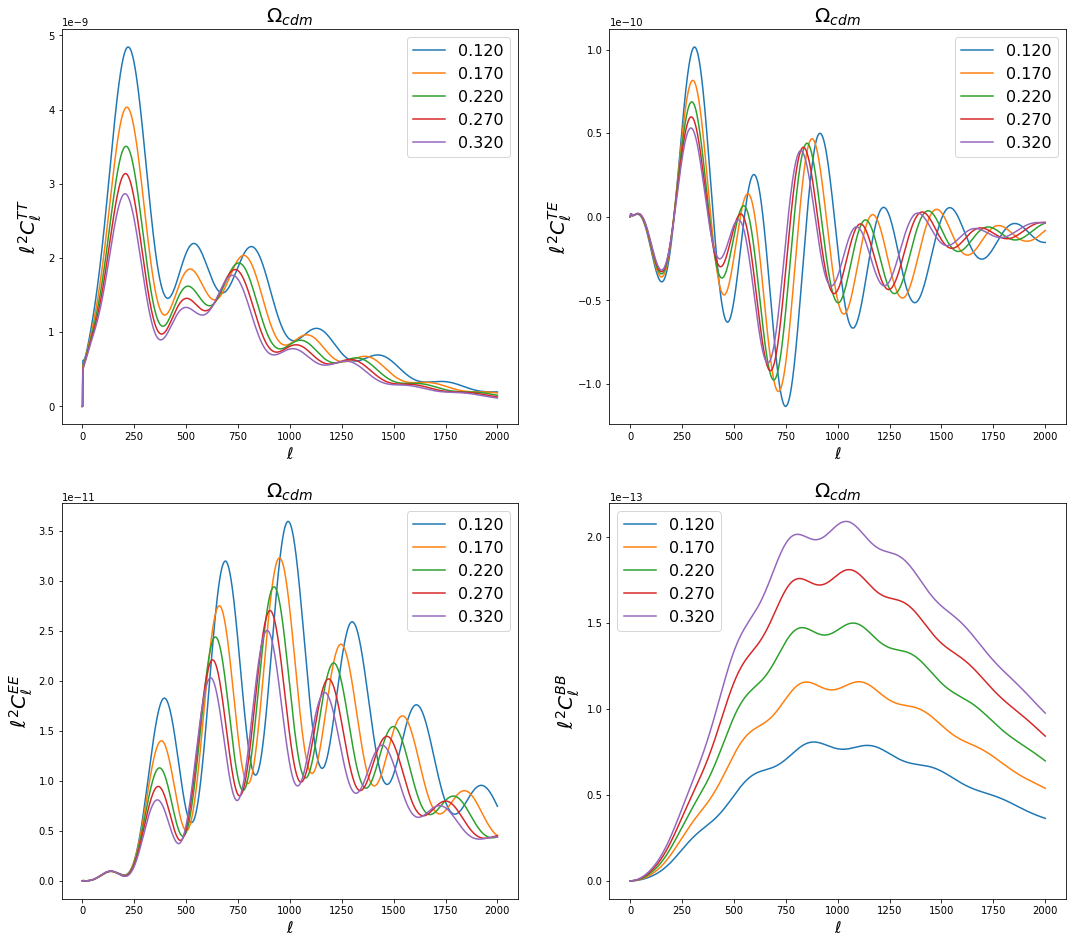

In [10]:
fig, axs = plt.subplots(2, 2,figsize = (18, 16))
axs[0,0].set_xlabel('$\ell$',fontsize=16)
axs[0,0].set_ylabel('$\ell^{2} C_{\ell}^{TT}$',fontsize=20)
axs[0,1].set_xlabel('$\ell$',fontsize=16)
axs[0,1].set_ylabel('$\ell^{2} C_{\ell}^{TE}$',fontsize=20)
axs[1,0].set_xlabel('$\ell$',fontsize=16)
axs[1,0].set_ylabel('$\ell^{2} C_{\ell}^{EE}$',fontsize=20)
axs[1,1].set_xlabel('$\ell$',fontsize=16)
axs[1,1].set_ylabel('$\ell^{2} C_{\ell}^{BB}$',fontsize=20)


for i in range(5):
    params['omega_cdm']= 0.120+i*0.05
    cl_tt = utility_function_call_CLASS(params)
    axs[0,0].plot(cl_tt['ell'],cl_tt['tt']*cl_tt['ell']**2,label= "%.3f"%params['omega_cdm'])
    axs[1,0].plot(cl_tt['ell'],cl_tt['ee']*cl_tt['ell']**2,label="%.3f"%params['omega_cdm'])
    axs[0,1].plot(cl_tt['ell'],cl_tt['te']*cl_tt['ell']**2,label="%.3f"%params['omega_cdm'])
    axs[1,1].plot(cl_tt['ell'],cl_tt['bb']*cl_tt['ell']**2,label="%.3f"%params['omega_cdm'])
    
axs[0,0].legend(fontsize=16)
axs[0,1].legend(fontsize=16)
axs[1,0].legend(fontsize=16)
axs[1,1].legend(fontsize=16)

axs[0,0].set_title('$\Omega_{cdm}$',fontsize=20)
axs[0,1].set_title('$\Omega_{cdm}$',fontsize=20)
axs[1,0].set_title('$\Omega_{cdm}$',fontsize=20)
axs[1,1].set_title('$\Omega_{cdm}$',fontsize=20)

axs[0,0].legend(fontsize=16)
axs[0,1].legend(fontsize=16)
axs[1,0].legend(fontsize=16)
axs[1,1].legend(fontsize=16)
params['omega_cdm']= 0.120

On fait varier $r$ le rapport tenseur, scalaire

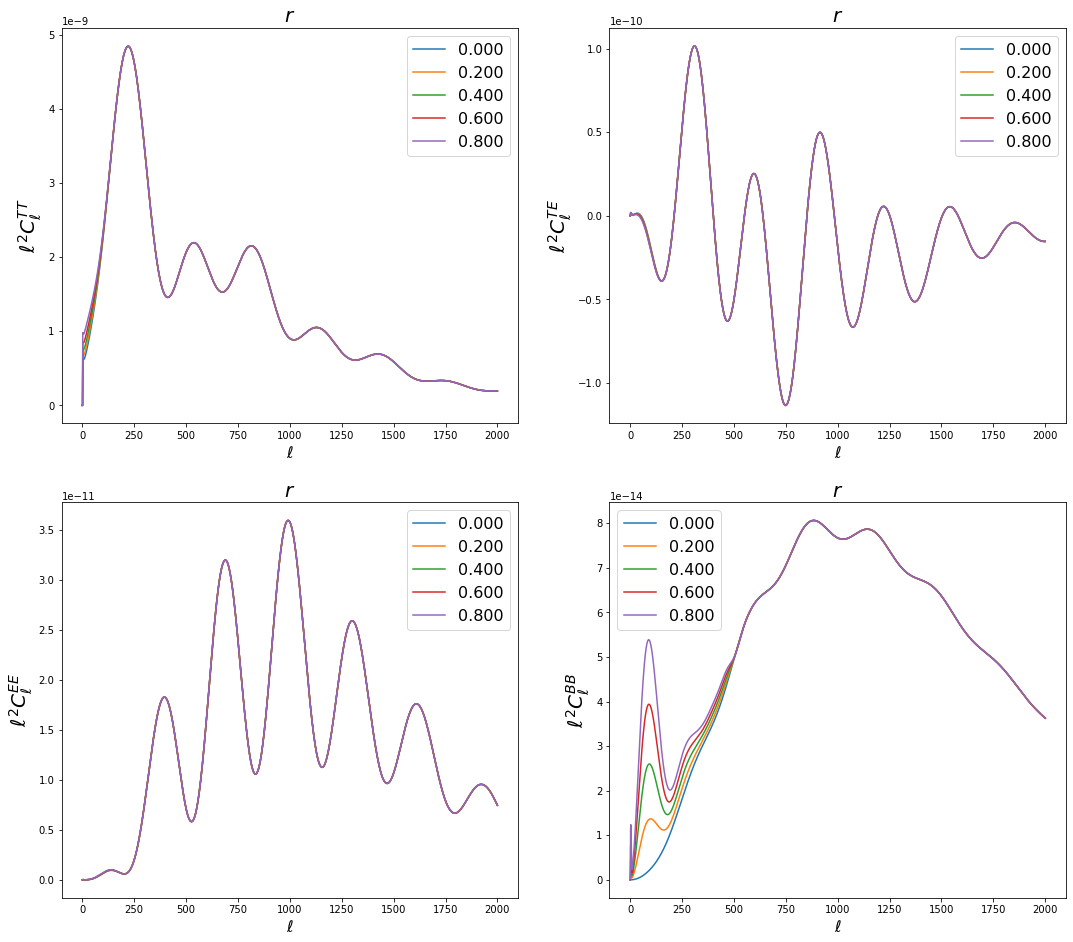

In [11]:
fig, axs = plt.subplots(2, 2,figsize = (18, 16))
axs[0,0].set_xlabel('$\ell$',fontsize=16)
axs[0,0].set_ylabel('$\ell^{2} C_{\ell}^{TT}$',fontsize=20)
axs[0,1].set_xlabel('$\ell$',fontsize=16)
axs[0,1].set_ylabel('$\ell^{2} C_{\ell}^{TE}$',fontsize=20)
axs[1,0].set_xlabel('$\ell$',fontsize=16)
axs[1,0].set_ylabel('$\ell^{2} C_{\ell}^{EE}$',fontsize=20)
axs[1,1].set_xlabel('$\ell$',fontsize=16)
axs[1,1].set_ylabel('$\ell^{2} C_{\ell}^{BB}$',fontsize=20)


for i in range(5):
    params['r']=0+i*0.2
    cl_tt = utility_function_call_CLASS(params)
    axs[0,0].plot(cl_tt['ell'],cl_tt['tt']*cl_tt['ell']**2,label= "%.3f"%params['r'])
    axs[1,0].plot(cl_tt['ell'],cl_tt['ee']*cl_tt['ell']**2,label="%.3f"%params['r'])
    axs[0,1].plot(cl_tt['ell'],cl_tt['te']*cl_tt['ell']**2,label="%.3f"%params['r'])
    axs[1,1].plot(cl_tt['ell'],cl_tt['bb']*cl_tt['ell']**2,label="%.3f"%params['r'])
    
axs[0,0].legend(fontsize=16)
axs[0,1].legend(fontsize=16)
axs[1,0].legend(fontsize=16)
axs[1,1].legend(fontsize=16)

axs[0,0].set_title('$r$',fontsize=20)
axs[0,1].set_title('$r$',fontsize=20)
axs[1,0].set_title('$r$',fontsize=20)
axs[1,1].set_title('$r$',fontsize=20)

axs[0,0].legend(fontsize=16)
axs[0,1].legend(fontsize=16)
axs[1,0].legend(fontsize=16)
axs[1,1].legend(fontsize=16)
params['r']=0

Nous donne la dérivée des $C_{\ell}$

In [ ]:
liste = ['omega_cdm','omega_b','h','ln10^{10}A_s','n_s','tau_reio','r']
stepsize = 0.001
cl_tt = utility_function_call_CLASS(params)
def get_deriv_new(parameter,stepsize):
    left_params = params.copy()
    left_params[parameter] = params[parameter] - stepsize
    right_params = params.copy()
    right_params[parameter] = params[parameter] + stepsize
    cl_left = utility_function_call_CLASS(left_params)
    cl_right = utility_function_call_CLASS(right_params)
    cl_tt_left = cl_left['tt']
    cl_tt_right = cl_right['tt']
    cl_te_left = cl_left['te']
    cl_te_right = cl_right['te']
    cl_ee_left = cl_left['ee']
    cl_ee_right = cl_right['ee']
    cl_bb_left = cl_left['bb']
    cl_bb_right = cl_right['bb']
    
    dCltt_dh = (cl_tt_right - cl_tt_left) / (2 * stepsize)
    dClte_dh = (cl_te_right - cl_te_left) / (2 * stepsize)
    dClee_dh = (cl_ee_right - cl_ee_left) / (2 * stepsize)
    dClbb_dh = (cl_bb_right - cl_bb_left) / (2 * stepsize)
    return dCltt_dh,dClte_dh,dClee_dh,dClbb_dh

for parameter in liste :
    res = get_deriv_new(parameter,stepsize)
    fig, axs = plt.subplots(2, 2,figsize = (18, 16))
    axs[0,0].plot(cl_tt['ell'],res[0]/cl_tt['tt'])#,label= "%.3f"%params['omega_cdm'])
    axs[1,0].plot(cl_tt['ell'],res[1]/cl_tt['te'])#,label="%.3f"%params['omega_cdm'])
    axs[0,1].plot(cl_tt['ell'],res[2]/cl_tt['ee'])#,label="%.3f"%params['omega_cdm'])
    axs[1,1].plot(cl_tt['ell'],res[3]/cl_tt['bb'])#,label="%.3f"%params['omega_cdm'])
    axs[0,0].set_xlabel('$\ell$',fontsize=20)
    axs[0,0].set_ylabel(r'$(\partial C_{\ell}^{TT} / \partial ) / C_{\ell}^{TT}$',fontsize=20)
    axs[0,1].set_xlabel('$\ell$',fontsize=20)
    axs[0,1].set_ylabel(r'$(\partial C_{\ell}^{TE} / \partial parameter) / C_{\ell}^{TT}$',fontsize=20)
    axs[1,0].set_xlabel('$\ell$',fontsize=20)
    axs[1,0].set_ylabel(r'$(\partial C_{\ell}^{EE} / \partial parameter) / C_{\ell}^{TT}$',fontsize=20)
    axs[1,1].set_xlabel('$\ell$',fontsize=20)
    axs[1,1].set_ylabel(r'$(\partial C_{\ell}^{BB} / \partial parameter) / C_{\ell}^{TT}$',fontsize=20)
    plt.show()

In [22]:
#Litebird optimiste
"""
sT = 2.16 * (np.pi/60./180.)*10**(-6)
sP = sT * np.sqrt(2.)
theta_FWHM =30 * (np.pi/60./180.)
"""
#Litebird non optimiste
sT = 2.8 * (np.pi/60./180.)*10**(-6)
sP = sT * np.sqrt(2.)
theta_FWHM =80 * (np.pi/60./180.)
"""
#paramètres Planck

sT = 33 * (np.pi/60./180.)*10**(-6)
sP = sT * np.sqrt(2.)
theta_FWHM = 7. * (np.pi/60./180.)
"""

#fonction du bruit
def noise(s,l):
    return s**2*np.exp(l*(l+1)*theta_FWHM**2/(8*np.log(2)))


def Fisher_noise(param1,param2,f_sky): 
    F_ij = 0
    stepsize = 0.01
    if param1==param2:
        res1 = get_deriv_new(param1,stepsize)
        res2 = res1
    if param1 != param2:
        res1 = get_deriv_new(param1,stepsize)
        res2 = get_deriv_new(param2,stepsize)
    cl = utility_function_call_CLASS(params)
    for l in nb.prange(2,2000):
        mat_cl = np.zeros((2,2))
        matder1 = np.zeros((2,2))
        matder2 = np.zeros((2,2))
        mat_cl[0,0] = cl['tt'][l]+noise(sT,l)
        mat_cl[0,1] = cl['te'][l]
        mat_cl[1,0] = cl['te'][l]
        mat_cl[1,1] = cl['ee'][l]+noise(sP,l)
        
        matder1[0,0] = res1[0][l]
        matder1[0,1] = res1[1][l]
        matder1[1,0] = res1[1][l]
        matder1[1,1] = res1[2][l]
        
        matder2[0,0] = res2[0][l]
        matder2[0,1] = res2[1][l]
        matder2[1,0] = res2[1][l]
        matder2[1,1] = res2[2][l]
        inv_cl = np.linalg.inv(mat_cl)
        F_ij += (2*l+1)*f_sky/2*np.trace(np.dot(np.dot(inv_cl,matder1),np.dot(inv_cl,matder2)))
    return F_ij

def Full_Fisher_noise(fsky):
    f_sky = fsky
    #liste = ['omega_cdm','omega_b','h','ln10^{10}A_s','n_s','tau_reio','r']
    liste = ['omega_cdm','omega_b','h','ln10^{10}A_s','n_s','tau_reio']
    Fisher = np.zeros((6,6))
    for i in range(6):
        for j in range(i,6):
            Fisher[i,j] = Fisher_noise(liste[i],liste[j],f_sky)
            print(i,j)
            
    for i in range(6):
        for j in range(i):
            Fisher[i,j]=Fisher[j,i]

    return Fisher



On regarde le bruit de Litebird et Planck



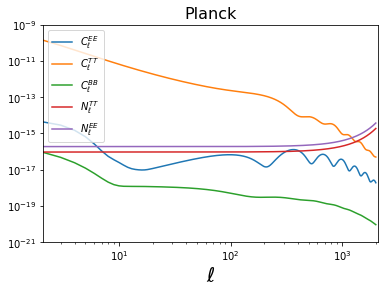

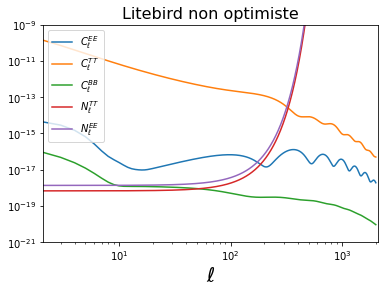

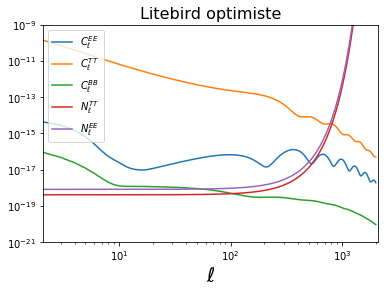

In [92]:
cl_tt = utility_function_call_CLASS(params)
plt.plot(cl_tt['ell'],cl_tt['ee'],label='$C_{\ell}^{EE}$')
plt.plot(cl_tt['ell'],cl_tt['tt'],label='$C_{\ell}^{TT}$')
plt.plot(cl_tt['ell'],cl_tt['bb'],label='$C_{\ell}^{BB}$')
sT = 33 * (np.pi/60./180.)*10**(-6)
sP = sT * np.sqrt(2.)
theta_FWHM = 7. * (np.pi/60./180.)

plt.plot(cl_tt['ell'],noise(sT,cl_tt['ell']),label = '$N_{\ell}^{TT}$')
plt.plot(cl_tt['ell'],noise(sP,cl_tt['ell']),label = '$N_{\ell}^{EE}$')
plt.yscale("log")
plt.xscale("log")
plt.xlim(2.1,2.1*10**3)
plt.ylim(10**(-21),10**(-9))
plt.xlabel(r'$\ell$',fontsize=20)
#plt.ylabel(r'$log(C_{\ell}^{TT})$',fontsize=20)
plt.legend(fontsize=10)
plt.title('Planck',fontsize=16)
plt.savefig('niveau_Planck.png')
plt.show()

plt.plot(cl_tt['ell'],cl_tt['ee'],label='$C_{\ell}^{EE}$')
plt.plot(cl_tt['ell'],cl_tt['tt'],label='$C_{\ell}^{TT}$')
plt.plot(cl_tt['ell'],cl_tt['bb'],label='$C_{\ell}^{BB}$')
sT = 2.8 * (np.pi/60./180.)*10**(-6)
sP = sT * np.sqrt(2.)
theta_FWHM = 80. * (np.pi/60./180.)

plt.plot(cl_tt['ell'],noise(sT,cl_tt['ell']),label = '$N_{\ell}^{TT}$')
plt.plot(cl_tt['ell'],noise(sP,cl_tt['ell']),label = '$N_{\ell}^{EE}$')
plt.yscale("log")
plt.xscale("log")
plt.xlim(2.1,2.1*10**3)
plt.ylim(10**(-21),10**(-9))
plt.xlabel(r'$\ell$',fontsize=20)
#plt.ylabel(r'$log(C_{\ell}^{TT})$',fontsize=20)
plt.legend(fontsize=10)
plt.savefig('niveau_Litebird.png')
plt.title('Litebird non optimiste',fontsize=16)
plt.show()

plt.plot(cl_tt['ell'],cl_tt['ee'],label='$C_{\ell}^{EE}$')
plt.plot(cl_tt['ell'],cl_tt['tt'],label='$C_{\ell}^{TT}$')
plt.plot(cl_tt['ell'],cl_tt['bb'],label='$C_{\ell}^{BB}$')
sT = 2.18 * (np.pi/60./180.)*10**(-6)
sP = sT * np.sqrt(2.)
theta_FWHM = 30. * (np.pi/60./180.)
plt.plot(cl_tt['ell'],noise(sT,cl_tt['ell']),label = '$N_{\ell}^{TT}$')
plt.plot(cl_tt['ell'],noise(sP,cl_tt['ell']),label = '$N_{\ell}^{EE}$')
plt.yscale("log")
plt.xscale("log")
plt.xlim(2.1,2.1*10**3)
plt.ylim(10**(-21),10**(-9))
plt.xlabel(r'$\ell$',fontsize=20)
#plt.ylabel(r'$log(C_{\ell}^{TT})$',fontsize=20)
plt.legend(fontsize=10)
plt.savefig('niveau_Litebird_optimiste.png')
plt.title('Litebird optimiste',fontsize=16)
plt.show()

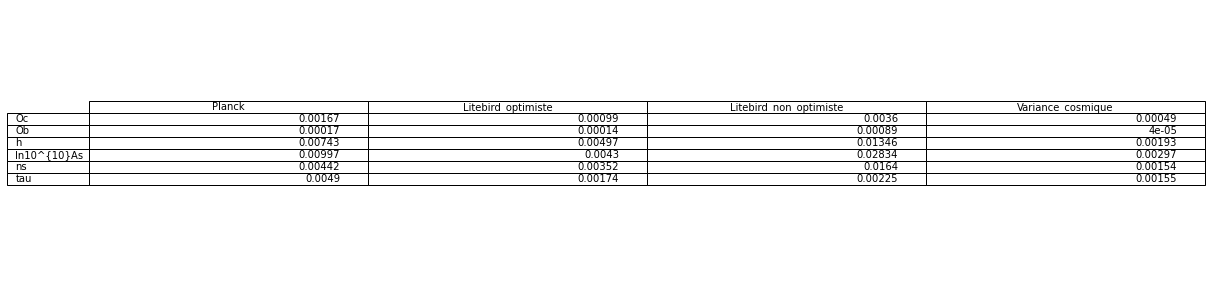

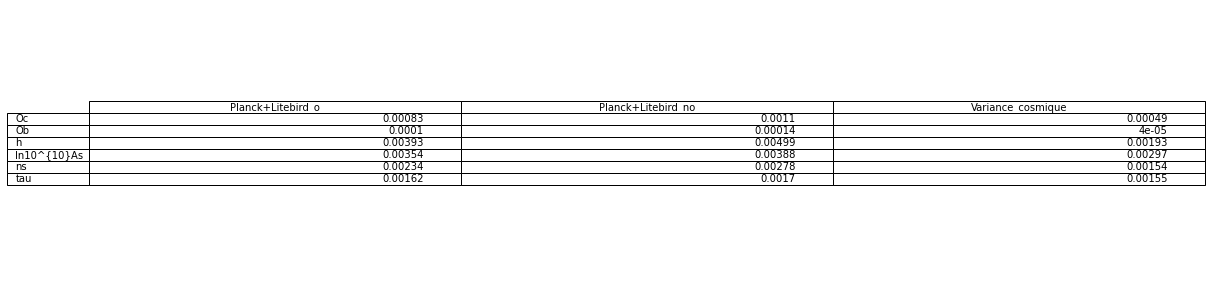

In [30]:



liteBIRD_opt= np.loadtxt('fisher_matrice_noise_litebird_opt')
liteBIRD_nopt= np.loadtxt('fisher_matrice_noise_litebird_nopt')
Planck = np.loadtxt('fisher_matrice_noise')
cosmique = np.loadtxt('fisher_matrice_cosmique')
Cov_Lo = np.sqrt(np.diag(np.linalg.inv(liteBIRD_opt)))
Cov_Lno = np.sqrt(np.diag(np.linalg.inv(liteBIRD_nopt)))
Cov_P = np.sqrt(np.diag(np.linalg.inv(Planck)))
Cov_V = np.sqrt(np.diag(np.linalg.inv(cosmique)))

fig, ax =plt.subplots(1,1,figsize = (20, 5))
data=np.zeros((6,4))
data[:,0] = np.around(Cov_P,5)
data[:,1] = np.around(Cov_Lo,5)
data[:,2] = np.around(Cov_Lno,5)
data[:,3] = np.around(Cov_V,5)

column_labels=["Planck", "Litebird_optimiste", "Litebird_non_optimiste","Variance_cosmique"]
row_labels = ["Oc","Ob","h","ln10^{10}As","ns","tau"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,rowLabels=row_labels,colLabels=column_labels,loc="center")

plt.show()


liteBIRD_opt= np.loadtxt('fisher_matrice_noise_litebird_opt')
liteBIRD_nopt= np.loadtxt('fisher_matrice_noise_litebird_nopt')
Planck = np.loadtxt('fisher_matrice_noise')
S1 = Planck+liteBIRD_opt
S2 = liteBIRD_nopt+Planck
Cov_S_opt = np.sqrt(np.diag(np.linalg.inv(S1)))
Cov_S_nopt = np.sqrt(np.diag(np.linalg.inv(S2)))
fig, ax =plt.subplots(1,1,figsize = (20, 5))
data=np.zeros((6,3))
data[:,0] = np.around(Cov_S_opt,5)
data[:,1] = np.around(Cov_S_nopt,5)
data[:,2] = np.around(Cov_V,5)


column_labels=["Planck+Litebird_o","Planck+Litebird_no","Variance_cosmique"]
row_labels = ["Oc","Ob","h","ln10^{10}As","ns","tau"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,rowLabels=row_labels,colLabels=column_labels,loc="center")

plt.show()



<ipython-input-31-25e7961ff8cd>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(column_labels, minor=False,fontsize=13)
<ipython-input-31-25e7961ff8cd>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(row_labels, minor=False,fontsize=13)


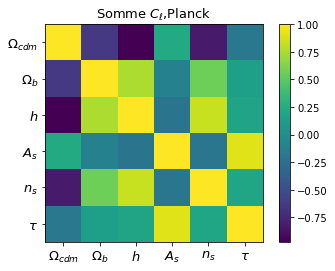

<ipython-input-31-25e7961ff8cd>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(column_labels, minor=False,fontsize=13)
<ipython-input-31-25e7961ff8cd>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(row_labels, minor=False,fontsize=13)


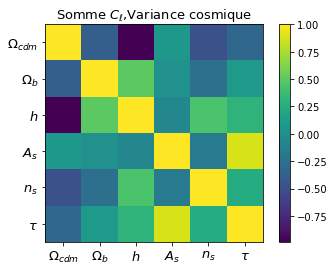

<ipython-input-31-25e7961ff8cd>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(column_labels, minor=False,fontsize=13)
<ipython-input-31-25e7961ff8cd>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(row_labels, minor=False,fontsize=13)


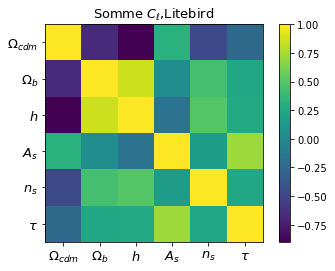

In [31]:
def Correlation(convolution):
    taille = np.shape(convolution)
    correlation = np.zeros(taille)
    for i in range(taille[0]):
        for j in range(taille[1]):
            correlation[i,j] = convolution[i,j]/np.sqrt(convolution[i,i]*convolution[j,j])
    return correlation

Cov = np.linalg.inv(np.loadtxt('fisher_matrice_noise'))
Cor = Correlation(Cov)
fig, ax = plt.subplots()
plt.imshow(Cor)
plt.colorbar()

liste = ['0',r'$\Omega_{cdm}$','$\Omega_{b}$','$h$','$A_{s}$','$n_{s}$',r'$\tau$']
#labels
column_labels = liste
row_labels = liste
ax.set_xticklabels(column_labels, minor=False,fontsize=13)
ax.set_yticklabels(row_labels, minor=False,fontsize=13)
plt.title('Somme $C_{\ell}$,Planck',fontsize=13)
plt.savefig('correlation.png')
plt.show()

Cov_cosmique = np.linalg.inv(np.loadtxt('fisher_matrice_cosmique'))
Cor_cosmique = Correlation(Cov_cosmique)
fig, ax = plt.subplots()
plt.imshow(Cor_cosmique)
plt.colorbar()

liste = ['0',r'$\Omega_{cdm}$','$\Omega_{b}$','$h$','$A_{s}$','$n_{s}$',r'$\tau$']
#labels
column_labels = liste
row_labels = liste
ax.set_xticklabels(column_labels, minor=False,fontsize=13)
ax.set_yticklabels(row_labels, minor=False,fontsize=13)
plt.title('Somme $C_{\ell}$,Variance cosmique',fontsize=13)
plt.savefig('correlation.png')
plt.show()


Cov_Litebird = np.linalg.inv(np.loadtxt('fisher_matrice_noise_litebird_opt'))
Cor_Litebird = Correlation(Cov_Litebird)
fig, ax = plt.subplots()
plt.imshow(Cor_Litebird)
plt.colorbar()

liste = ['0',r'$\Omega_{cdm}$','$\Omega_{b}$','$h$','$A_{s}$','$n_{s}$',r'$\tau$']
#labels
column_labels = liste
row_labels = liste
ax.set_xticklabels(column_labels, minor=False,fontsize=13)
ax.set_yticklabels(row_labels, minor=False,fontsize=13)
plt.title('Somme $C_{\ell}$,Litebird',fontsize=13)
plt.savefig('correlation.png')
plt.show()



On fait varier $\ell_{min}$ et $\ell_{max}$ dans la matrice de Fisher. 


$$ \mathbf{C}_{\ell} \equiv 
  \left( {\begin{array}{cc}
   C_{\ell}^{TT} + N_{\ell}^{TT} & C_{\ell}^{TE} \\
   C_{\ell}^{TE} & C_{\ell}^{EE} + N_{\ell}^{EE} \\
  \end{array} } \right)
 $$
 
 
 
$$ F_{ij} = \sum_{\ell_{min}}^{\ell_{max}} \frac{2 \ell + 1}{2} f_{\mathrm{sky}} \mathrm{Tr}\,\left( \mathbf{C}_{\ell}^{-1} \frac{\partial \mathbf{C}_{\ell}}{\partial \theta_i} \mathbf{C}_{\ell}^{-1} \frac{\mathbf{C}_{\ell}}{\partial \theta_j} \right)$$



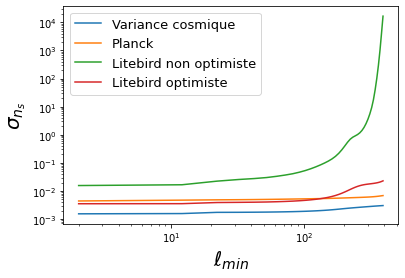

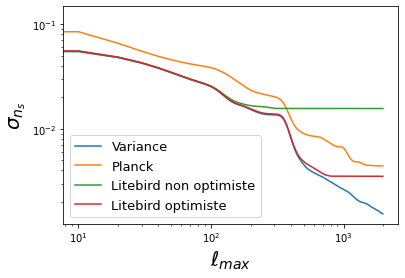

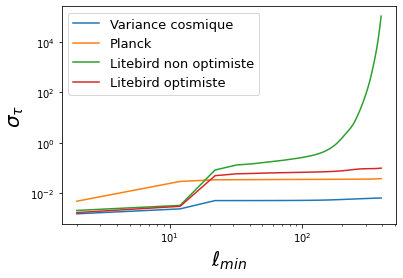

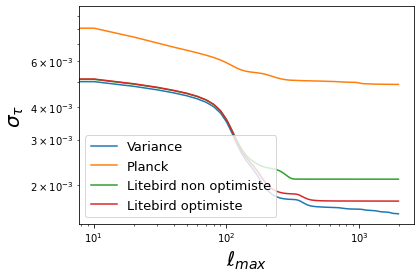

In [51]:
lmin_Litebird =np.loadtxt('bin_new_try')
lmax_Litebird = np.loadtxt('bin_Litebird_max')
lmin_Planck = np.loadtxt('bin_new_Planck')
lmax_Planck = np.loadtxt('bin_Planck_max')
lmin_Variance = np.loadtxt('bin_Variance_min')
lmax_Variance = np.loadtxt('bin_Variance_max')
lmax_Litebird_o = np.loadtxt('Litebird_optimiste_lmax_ns')
lmin_Litebird_o = np.loadtxt('Litebird_optimiste_lmin_ns')

lmin_Litebird_tau =np.loadtxt('bin_Litebird_min_tau')
lmax_Litebird_tau = np.loadtxt('bin_Litebird_max_tau')
lmin_Planck_tau = np.loadtxt('bin_Planck_min_tau')
lmax_Planck_tau = np.loadtxt('bin_Planck_max_tau')
lmin_Variance_tau = np.loadtxt('bin_Variance_min_tau')
lmax_Variance_tau = np.loadtxt('bin_Variance_max_tau')
lmax_Litebird_o_tau = np.loadtxt('Litebird_optimiste_lmax_tau')
lmin_Litebird_o_tau = np.loadtxt('Litebird_optimiste_lmin_tau')

l = np.arange(2,1002,10)
plt.plot(l[:40],lmin_Variance[:40],label='Variance cosmique')
plt.plot(l[:40],lmin_Planck[:40],label='Planck')
plt.plot(l[:40],lmin_Litebird[:40],label='Litebird non optimiste')
plt.plot(l[:40],lmin_Litebird_o[:40],label='Litebird optimiste')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('$\ell_{min}$',fontsize=20)
plt.ylabel('$\sigma_{n_{s}}$',fontsize=20)
plt.legend(fontsize=13)
plt.savefig('lmin_ns.png')
plt.show()


lm = np.linspace(1980,0,198)
plt.plot(lm[:],lmax_Variance[:],label='Variance')
plt.plot(lm[:],lmax_Planck[:],label='Planck')
plt.plot(lm[:],lmax_Litebird[:],label='Litebird non optimiste')
plt.plot(lm[:],lmax_Litebird_o[:],label='Litebird optimiste')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('$\ell_{max}$',fontsize=20)
plt.ylabel('$\sigma_{n_{s}}$',fontsize=20)
plt.legend(fontsize=13)
plt.savefig('lmax_ns.png')
plt.show()

l = np.arange(2,2002,10)

plt.plot(l[:40],lmin_Variance_tau[:40],label='Variance cosmique')
plt.plot(l[:40],lmin_Planck_tau[:40],label='Planck')
plt.plot(l[:40],lmin_Litebird_tau[:40],label='Litebird non optimiste')
plt.plot(l[:40],lmin_Litebird_o_tau[:40],label='Litebird optimiste')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$\ell_{min}$',fontsize=20)
plt.ylabel(r'$\sigma_{\tau}$',fontsize=20)
plt.legend(fontsize=13)
plt.savefig('lmin_tau.png')
plt.show()


lm = np.linspace(1980,0,198)
plt.plot(lm[:],lmax_Variance_tau[:],label='Variance')
plt.plot(lm[:],lmax_Planck_tau[:],label='Planck')
plt.plot(lm[:],lmax_Litebird_tau[:],label='Litebird non optimiste')
plt.plot(lm[:],lmax_Litebird_o_tau[:],label='Litebird optimiste')


plt.yscale('log')
plt.xscale('log')
plt.xlabel('$\ell_{max}$',fontsize=20)
plt.ylabel(r'$\sigma_{\tau}$',fontsize=20)
plt.legend(fontsize=13)
plt.savefig('lmax_tau.png')
plt.show()



On effectue un binage de la matrice de Fisher. La matrice n'est pas inversible si le pas est trop petit, on a trop de degrés de liberté (6) et pas assez d'information. Même si l'on prend $\ell$ plus grand, les paramètres sont très corrélés, on gagne peu d'information.

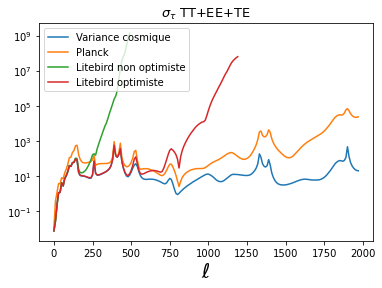

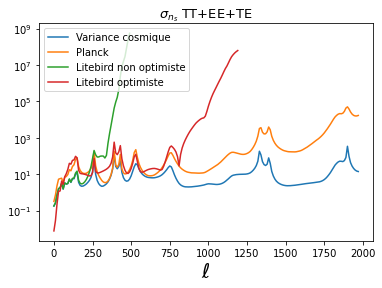

In [48]:
planck_somme = np.loadtxt('Planck_Somme_ns')
variance_somme = np.loadtxt('Variance_Somme_ns')
litebird_somme = np.loadtxt('Litebird_Somme_ns')
litebird_o_somme_tau = np.loadtxt('Litebird_optimiste_Somme_ns')

planck_somme_tau = np.loadtxt('Planck_Somme_tau')
variance_somme_tau = np.loadtxt('Variance_Somme_tau')
litebird_somme_tau = np.loadtxt('Litebird_Somme_tau')
litebird_o_somme_tau = np.loadtxt('Litebird_optimiste_Somme_tau')

plt.plot(np.arange(0,1980,10),variance_somme_tau[:198],label='Variance cosmique')
plt.plot(np.arange(0,1980,10),planck_somme_tau[:198],label='Planck')
plt.plot(np.arange(0,500,10),litebird_somme_tau[:50],label='Litebird non optimiste')
plt.plot(np.arange(0,1200,10),litebird_o_somme_tau[:120],label='Litebird optimiste')
plt.xlabel('$\ell$',fontsize=20)
plt.yscale("log")
plt.title(r'$\sigma_{\tau}$ TT+EE+TE',fontsize=13)
plt.legend()
plt.savefig('sigma_tau.jpeg')
plt.show()


plt.plot(np.arange(0,1980,10),variance_somme[:198],label='Variance cosmique')
plt.plot(np.arange(0,1980,10),planck_somme[:198],label='Planck')
plt.plot(np.arange(0,500,10),litebird_somme[:50],label='Litebird non optimiste')
plt.plot(np.arange(0,1200,10),litebird_o_somme_tau[:120],label='Litebird optimiste')
plt.xlabel('$\ell$',fontsize=20)
plt.yscale("log")
plt.title('$\sigma_{n_{s}}$ TT+EE+TE',fontsize=13)
plt.legend()
plt.savefig('sigma_n_s.jpeg')
plt.show()

On etudie la dépendance de $\sigma_{n_{s}}$ en fonction de la valeur de $r$ le ratio tenseur scalaire

In [ ]:
r = np.array([10**(-4),10**(-3),10**(-2),10**(-1)])
sigma_ns = np.zeros((4))
for i in range(4):
    params['r']=r[i]
    resultat = Full_Fisher_noise()
    Cov_ns = np.sqrt(np.diag(np.linalg.inv(resultat)))
    sigma_ns[i] = Cov_ns[5]
    print(sigma_ns[i],i)
    
    
np.savetxt('sigma_tau_r_Lno',sigma_ns)

Text(0, 0.5, '$\\sigma_{\\tau}$')

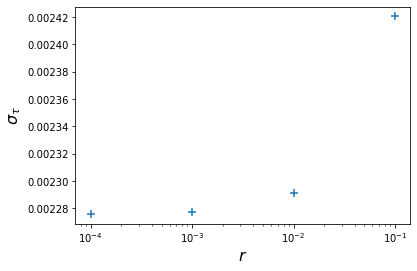

In [28]:
sigma_r = np.loadtxt('sigma_tau_r_Lno')
plt.scatter(r,sigma_r,marker='+',s=50)

plt.xlabel('$r$',fontsize=16)
plt.xscale("log")
#plt.yscale('log')
plt.ylabel(r'$\sigma_{\tau}$',fontsize=16)
#devrait être pas mal


On regarde la corrélation entre $\tau$ et $A_{s}$

In [77]:
def Full_Fisher_noise_tau_A_s():
    f_sky = 1
    liste = ['ln10^{10}A_s','tau_reio']
    Fisher = np.zeros((2,2))
    for i in range(2):
        for j in range(i,2):
            Fisher[i,j] = Fisher_noise(liste[i],liste[j],f_sky)
            print(i,j)
            
    for i in range(2):
        for j in range(i):
            Fisher[i,j]=Fisher[j,i]

    return Fisher

resultat = Full_Fisher_noise_tau_A_s()
print(np.sqrt(1/resultat[1,1]),'tau seul')
Cov_tau = np.sqrt(np.diag(np.linalg.inv(resultat)))
print(Cov_tau[1],'tau+A_s')



0 0
0 1
1 1
0.001393072648231766 tau seul
0.0018194452994300609 tau+A_s


On regarde l'influence de $\sigma_{\tau}$ en fonction de $f_{sky}$  

In [ ]:
fsky = np.linspace(0.2,1,8)
sigma_tau = np.zeros((8))
for i in range(8):
    resultat = Full_Fisher_noise(fsky[i])
    Cov_tau = np.sqrt(np.diag(np.linalg.inv(resultat)))
    sigma_tau[i] = Cov_tau[5]
    

np.savetxt('sigma_tau_fsky_Lno',sigma_tau)

Text(0, 0.5, '$\\sigma_{\\tau}$')

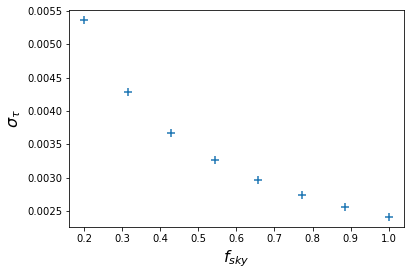

In [29]:
sigma_f = np.loadtxt('sigma_tau_fsky_Lno')
plt.scatter(fsky,sigma_f,marker='+',s=50)

plt.xlabel('$f_{sky}$',fontsize=16)
#plt.xscale("log")
#plt.yscale('log')
plt.ylabel(r'$\sigma_{\tau}$',fontsize=16)
#devrait être pas mal
